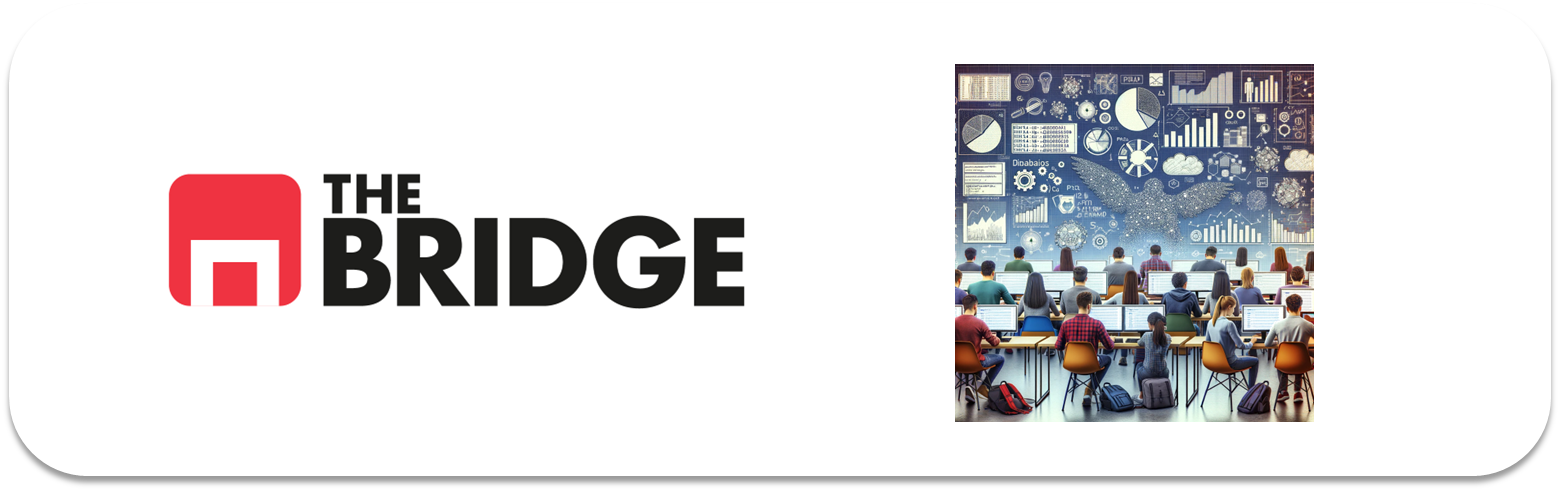

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

In [3]:
## Escogemos nuestra variable objetivo y comprobamos su distribución

In [4]:
target = "MEDV"

<Axes: xlabel='MEDV', ylabel='Count'>

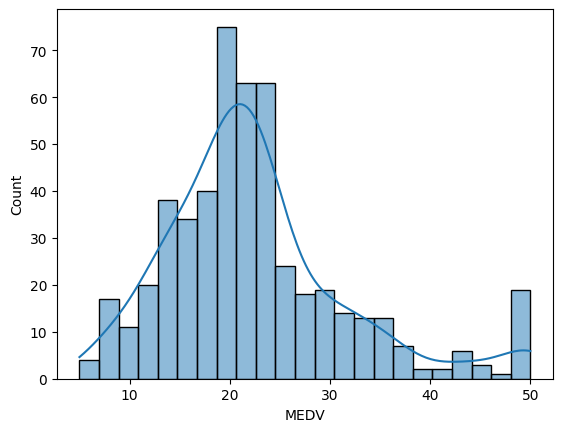

In [5]:
sns.histplot(x = target, data = df, kde = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
df.sample(10, random_state=42) # en vez de head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,17.27,16.1
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,11.97,20.0
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,18.33,17.8
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,24.16,14.0
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,12.87,19.6
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8


3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test

In [8]:
## Dividimos en train y test

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

### Mini-eda


In [10]:
## Bivariante  -> target con todas las demas
## Colinealidad de features -> Le sienta mal para generalizar -> Heatmap de las variables numéricas

In [11]:
corr = train_set.corr(numeric_only = True) # ver la correlación sobre el train de las numéricas

In [12]:
corr[target].sort_values(ascending = False) # ver la correlación respecto al target

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [13]:
##Tan importante es la correlación como la anticorrelación (valores cercanos a 1 y a -1), así que mejor convertir a valores absolutos

In [14]:
serie_corr = np.abs(corr[target]).sort_values(ascending = False)
serie_corr

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64

In [15]:
## Ojo con las CATEGÓRICAS (RAD y CHAS) que se han colado en nuestro análisis de correlación, tendríamos que haberlas quitado antes para no eliminarlas por error

In [16]:
train_set["CHAS"].value_counts() # vemos la distribución de CHAS y RAD

CHAS
0.0    375
1.0     29
Name: count, dtype: int64

In [17]:
train_set["RAD"].value_counts(normalize=True)

RAD
24.0    0.250000
5.0     0.232673
4.0     0.198020
3.0     0.079208
6.0     0.056931
8.0     0.051980
2.0     0.051980
1.0     0.042079
7.0     0.037129
Name: proportion, dtype: float64

In [18]:
criterio = 0.31 # Fijamos un criterio para seleccionar nuestras features numéricas

features_num = serie_corr[serie_corr > criterio].index.to_list()

features_num.remove(target) # Quitamos el target
features_num.remove("RAD") # Quitamos RAD porque la vamos a considerar categorica y ya hemos quitado CHAS con el criterio 0.31, pero mejor quitarlas antes

In [19]:
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE']

In [20]:
## Ahora comprobamos la colinealidad de la variables numéricas entre si, ordenadas en base a su correlación con la variable objetivo

In [21]:
train_set[features_num].corr(numeric_only = True)

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,AGE
LSTAT,1.000000,-0.612577,0.360167,0.603644,0.530632,0.593862,0.414142,0.571051
RM,-0.612577,1.000000,-0.342643,-0.398690,-0.281127,-0.299615,-0.200303,-0.210863
PTRATIO,0.360167,-0.342643,1.000000,0.348303,0.444836,0.161253,0.288970,0.240841
INDUS,0.603644,-0.398690,0.348303,1.000000,0.702353,0.770957,0.400198,0.636569
TAX,0.530632,-0.281127,0.444836,0.702353,1.000000,0.650247,0.576894,0.471670
NOX,0.593862,-0.299615,0.161253,0.770957,0.650247,1.000000,0.396406,0.720417
CRIM,0.414142,-0.200303,0.288970,0.400198,0.576894,0.396406,1.000000,0.334090
AGE,0.571051,-0.210863,0.240841,0.636569,0.471670,0.720417,0.334090,1.000000


In [22]:
criterio_col = 0.7  # Se suele establecer un 70%-80% colinealidad 
excluidas = []
corr_numeric = train_set[features_num].corr(numeric_only = True)

for col in features_num:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de LSTAT
	Comprobando LSTAT con LSTAT
		Son la misma variable, no comprobamos
	Comprobando LSTAT con RM
		LSTAT correla con RM al -0.6126, mantenemos RM
	Comprobando LSTAT con PTRATIO
		LSTAT correla con PTRATIO al 0.3602, mantenemos PTRATIO
	Comprobando LSTAT con INDUS
		LSTAT correla con INDUS al 0.6036, mantenemos INDUS
	Comprobando LSTAT con TAX
		LSTAT correla con TAX al 0.5306, mantenemos TAX
	Comprobando LSTAT con NOX
		LSTAT correla con NOX al 0.5939, mantenemos NOX
	Comprobando LSTAT con CRIM
		LSTAT correla con CRIM al 0.4141, mantenemos CRIM
	Comprobando LSTAT con AGE
		LSTAT correla con AGE al 0.5711, mantenemos AGE
Comprobando colinealidad de RM
	Comprobando RM con LSTAT
		RM correla con LSTAT al -0.6126, mantenemos LSTAT
	Comprobando RM con RM
		Son la misma variable, no comprobamos
	Comprobando RM con PTRATIO
		RM correla con PTRATIO al -0.3426, mantenemos PTRATIO
	Comprobando RM con INDUS
		RM correla con INDUS al -0.3987, mantenemos INDUS
	Comp

In [23]:
for excluida in excluidas: # Excluimos las variables a excluir de nuestra lista de numéricas
    features_num.remove(excluida)

features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

<Axes: >

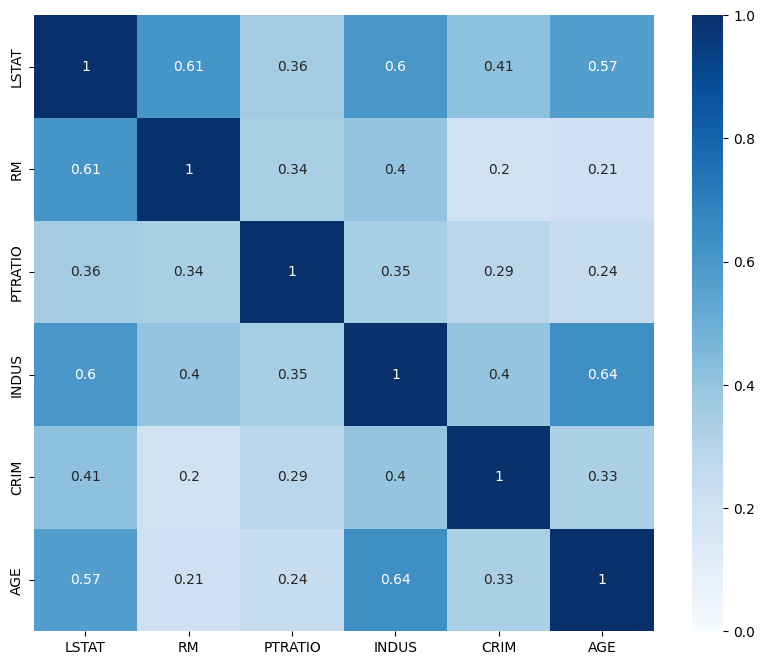

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(np.abs(train_set[features_num].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1)

Recuperamos las categóricas

In [25]:
features_cat = ["CHAS","RAD"]

<Axes: xlabel='MEDV', ylabel='Count'>

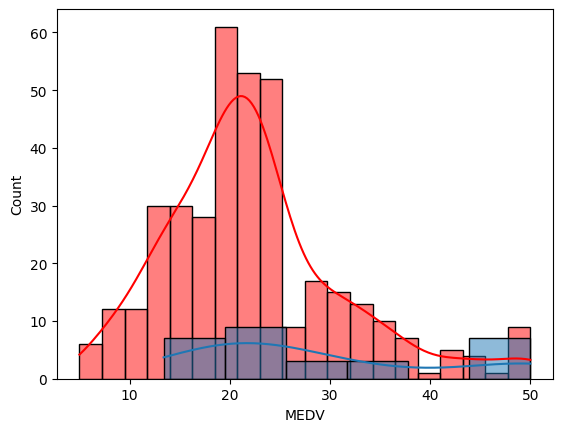

In [26]:
sns.histplot(x= target, data = train_set[train_set.CHAS == 0], kde = True, color = "red")
sns.histplot(x= target, data = train_set[train_set.CHAS == 1], kde = True)

In [27]:
train_set.RAD.value_counts(normalize = True)

RAD
24.0    0.250000
5.0     0.232673
4.0     0.198020
3.0     0.079208
6.0     0.056931
8.0     0.051980
2.0     0.051980
1.0     0.042079
7.0     0.037129
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

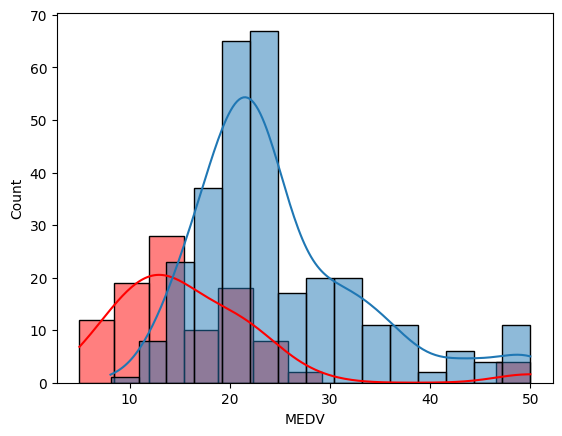

In [28]:
sns.histplot(x= target, data = train_set[train_set.RAD == 24], kde = True, color = "red") # Comprobamos RAD igual a 24 y RAD distinto a 24
sns.histplot(x= target, data = train_set[train_set.RAD != 24], kde = True)

En resumen mi feature selection me dice:

In [29]:
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

In [30]:
features_cat  # a lo mejor CHAS la eliminaría

['CHAS', 'RAD']

6. Trata las variables para que funcionen lo mejor posible en el modelo.

Procesamos las numéricas, primero transformamos y luego escalamos

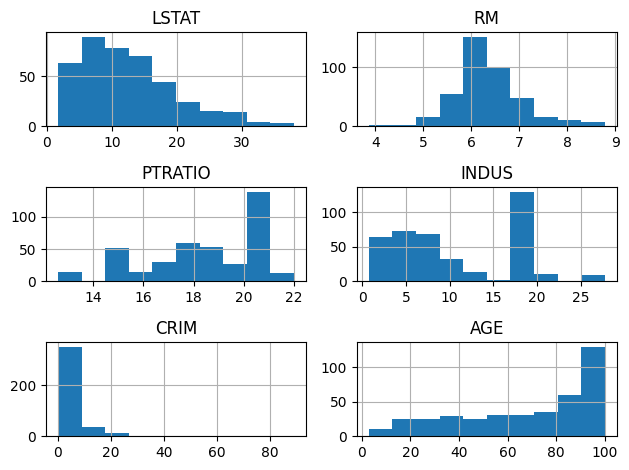

In [31]:
train_set[features_num].hist()
plt.tight_layout()

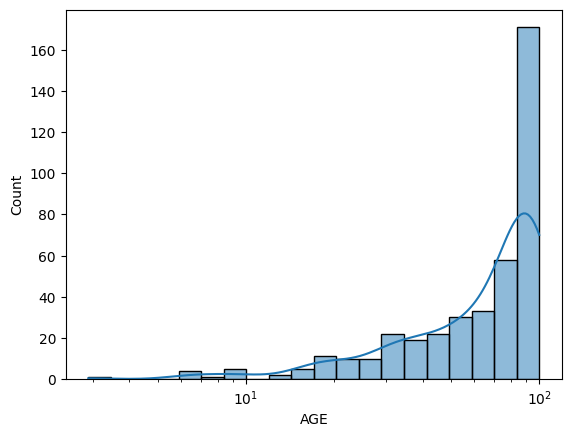

In [32]:
# ¿Habría alguna forma de mejorar la distribución de age? De momento se quedará como está
sns.histplot(train_set["AGE"], bins=20, kde=True, log_scale=10);

In [33]:
train_bck = train_set.copy() # Copia de seguridad antes de transformar

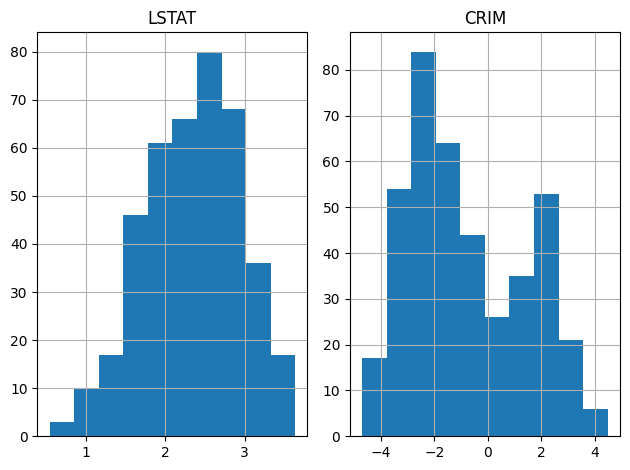

In [ ]:
features_transform = ["LSTAT","CRIM"] # Aplico transformación logarítmica a estas variables,
                                    #  para que tengan distribución más normal 

for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_transform].hist()
plt.tight_layout();

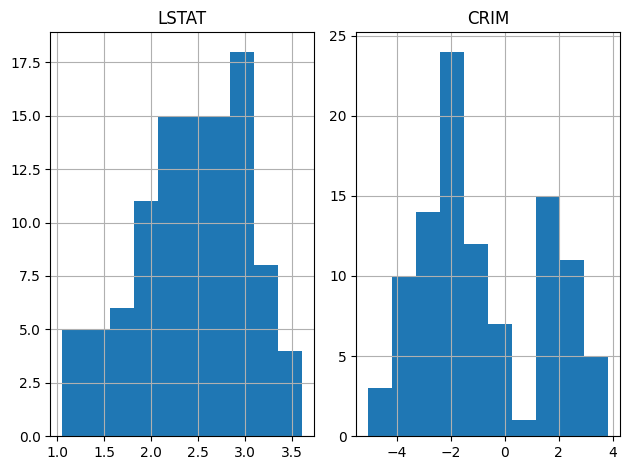

In [35]:
features_transform = ["LSTAT","CRIM"] # Lo aplicamos también en test

for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_transform].hist()
plt.tight_layout();

Escalamos las numéricas

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_set[features_num]) # Entreno solo con datos de train

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [37]:
scaler.scale_

array([ 0.60168758,  0.70857318,  2.22594093,  6.88607935,  2.14475377,
       27.96025349])

In [38]:
# Aplico escalado a ambos sets, train y test
train_set[features_num] = scaler.transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [40]:
train_set[features_num].describe() # Ahora la desviación estándar (std) de todas las numéricas de train es 1

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,1.648846e-18,-2.616169e-16,8.519038e-16,-4.177077e-17,-3.297692e-18,-4.858600e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-3.000707e+00,-3.461733e+00,-2.568944e+00,-1.487791e+00,-1.831385e+00,-2.348206e+00
25%,-7.325080e-01,-6.003488e-01,-6.821011e-01,-8.502733e-01,-8.075264e-01,-8.228264e-01
50%,6.221804e-02,-1.494427e-01,1.714705e-01,-3.521669e-01,-2.637886e-01,3.270201e-01
75%,7.345853e-01,4.528240e-01,8.453428e-01,1.033237e+00,9.044722e-01,8.974727e-01
max,2.132647e+00,3.477564e+00,1.653990e+00,2.433163e+00,2.454541e+00,1.124581e+00


In [41]:
test_set[features_num].describe()

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.143094,-0.218831,0.305805,0.109307,-0.010222,0.003276
std,0.985020,0.936848,0.808906,0.976256,1.039657,1.033283
min,-2.153641,-3.887942,-2.389244,-1.528453,-1.999306,-2.230181
25%,-0.521901,-0.628927,0.036696,-0.709046,-0.774743,-0.885415
50%,0.263976,-0.205189,0.396095,-0.057369,-0.367207,0.219725
75%,0.893702,0.230546,0.845343,1.033237,1.065387,0.953803
max,2.088738,2.424744,1.653990,2.433163,2.144360,1.124581


In [42]:
features_all = features_num + features_cat # Estas son las variables que vamos a usar en nuestro modelo
features_all

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'CHAS', 'RAD']

Separamos en features (X) y target (y)

In [43]:
X_train = train_set[features_all]
y_train = train_set[target]

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    404 non-null    float64
 1   RM       404 non-null    float64
 2   PTRATIO  404 non-null    float64
 3   INDUS    404 non-null    float64
 4   CRIM     404 non-null    float64
 5   AGE      404 non-null    float64
 6   CHAS     404 non-null    float64
 7   RAD      404 non-null    float64
dtypes: float64(8)
memory usage: 28.4 KB


In [45]:
X_test = test_set[features_all]
y_test = test_set[target]

In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    102 non-null    float64
 1   RM       102 non-null    float64
 2   PTRATIO  102 non-null    float64
 3   INDUS    102 non-null    float64
 4   CRIM     102 non-null    float64
 5   AGE      102 non-null    float64
 6   CHAS     102 non-null    float64
 7   RAD      102 non-null    float64
dtypes: float64(8)
memory usage: 7.2 KB


7. Construye un modelo de regresión lineal.

Entrenamos el regresor lineal

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
X_train

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE,CHAS,RAD
477,1.432072,-1.428069,0.845343,1.033237,1.625187,1.028015,0.0,24.0
15,-0.360783,-0.680087,1.204741,-0.413160,0.144459,-0.431199,0.0,4.0
332,-0.491363,-0.402063,-0.637176,-0.715218,-1.205804,-1.618599,0.0,1.0
423,1.320311,-0.300450,0.845343,1.033237,1.272456,0.591681,0.0,24.0
19,0.115378,-0.831094,1.204741,-0.413160,0.212396,0.033747,0.0,4.0
...,...,...,...,...,...,...,...,...
106,0.951944,-0.677264,1.159817,-0.352167,-0.461081,0.834884,0.0,5.0
270,0.351245,-0.649038,0.126546,-0.584520,-0.200844,-0.946216,0.0,3.0
348,-0.936562,0.450354,-0.592251,-1.303361,-1.595998,-1.389703,0.0,4.0
435,1.318883,0.441886,0.845343,1.033237,1.486599,0.931450,0.0,24.0


In [49]:
# Ecuación de la recta -> y = w1*x1 + w2*x2 + ... + wn*xn + b # BIAS

In [50]:
lin_reg.intercept_ # Intercepto o secante -> b

np.float64(22.76086760016004)

In [51]:
lin_reg.coef_ # Coeficientes -> w1, w2, ... , wn

array([-5.89917461,  2.18621366, -1.53292696, -0.2226208 , -0.01579426,
        1.16161941,  2.79678161, -0.01764476])

In [52]:
lin_reg.feature_names_in_

array(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'CHAS', 'RAD'],
      dtype=object)

In [53]:
print("y_est = ", end = "") # Nuestra ecuación de la recta
for coef, feat in zip(lin_reg.coef_, lin_reg.feature_names_in_):
    print(f"{coef:0.6f}*{feat}", end = " + ")
print(f"{lin_reg.intercept_:0.6f}")

y_est = -5.899175*LSTAT + 2.186214*RM + -1.532927*PTRATIO + -0.222621*INDUS + -0.015794*CRIM + 1.161619*AGE + 2.796782*CHAS + -0.017645*RAD + 22.760868


8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [54]:
### train_error

from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

pred_train = lin_reg.predict(X_train)

print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))
print("R^2:", lin_reg.score(X_train, y_train))

MAE: 2.788810206476949
RMSE: 4.628569638375891
R^2: 0.7533922241784252


In [55]:
### test_error

from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

pred_test = lin_reg.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", root_mean_squared_error(y_test, pred_test))
print("R^2:", lin_reg.score(X_test, y_test))

MAE: 1.712859273936978
RMSE: 4.502376297291164
R^2: 0.7235736184768786


RMSE en test es mejor que train pero muy similar, **el modelo generaliza bien**

Text(0, 0.5, 'Prediction')

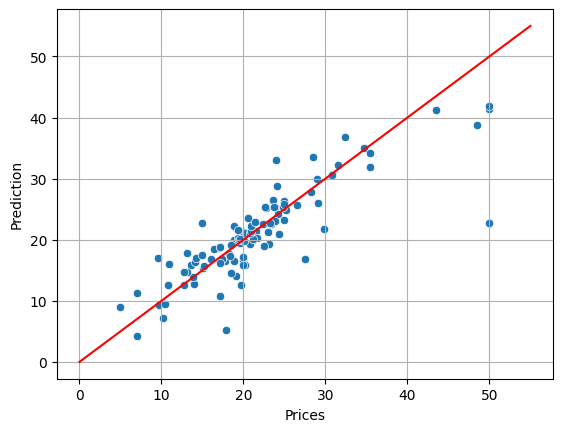

In [56]:
sns.scatterplot(x=y_test, y= pred_test) # Comprobamos valores predichos contra conocidos
plt.plot([0,55],[0,55],'red') # Si los valores coincidiesen con esta recta significa que no habría error en las predicciones
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Prediction')


10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.


Por último, regularizamos

In [ ]:
### Regularizacion 
# # Los hiperparámetros no están optimizados, haced vuestras propias pruebas

from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha = 1) # L2
lasso_reg = Lasso(alpha = 1) # L1
elastic_reg = ElasticNet(alpha = 1, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train, y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("\tMAE:", median_absolute_error(y_train, pred_train))
    print("\tRMSE:", root_mean_squared_error(y_train, pred_train))
    print("\tR^2:", model.score(X_train, y_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("\tMAE:", median_absolute_error(y_test, pred_test))
    print("\tRMSE:", root_mean_squared_error(y_test, pred_test))
    print("\tR^2:", model.score(X_test, y_test))
    print("")

Modelo: Ridge
TRAIN:
	MAE: 2.785110913694444
	RMSE: 4.628681505945837
	R^2: 0.7533803035428315
TEST:
	MAE: 1.7163701541844123
	RMSE: 4.505059195617935
	R^2: 0.7232440836762588

Modelo: Lasso
TRAIN:
	MAE: 2.796947427574059
	RMSE: 4.970976676309575
	R^2: 0.7155561077826766
TEST:
	MAE: 2.2467414555222565
	RMSE: 4.811927338954871
	R^2: 0.6842567815605474

Modelo: ElasticNet
TRAIN:
	MAE: 2.8630204324530686
	RMSE: 5.30975979645097
	R^2: 0.6754639757155327
TEST:
	MAE: 2.461267746337418
	RMSE: 5.134661091427596
	R^2: 0.6404829617724536

